(**Click the icon below to open this notebook in Colab**)

[![Open InColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/machine-learning-for-actuarial-science/blob/main/2025-spring/week07/notebook/demo.ipynb)

## Time Series data - Example: S&P 500 Index

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

stock_symbol = '^GSPC'
start_date = '2020-01-01'
end_date = '2024-12-31'

# Download historical data
df_sp500 = yf.download(stock_symbol, start=start_date, end=end_date)
df_sp500.head(10)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000
2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000
2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000
2020-01-09,3274.699951,3275.580078,3263.669922,3266.030029,3641230000
2020-01-10,3265.350098,3282.989990,3260.860107,3281.810059,3214580000
2020-01-13,3288.129883,3288.129883,3268.429932,3271.129883,3459390000


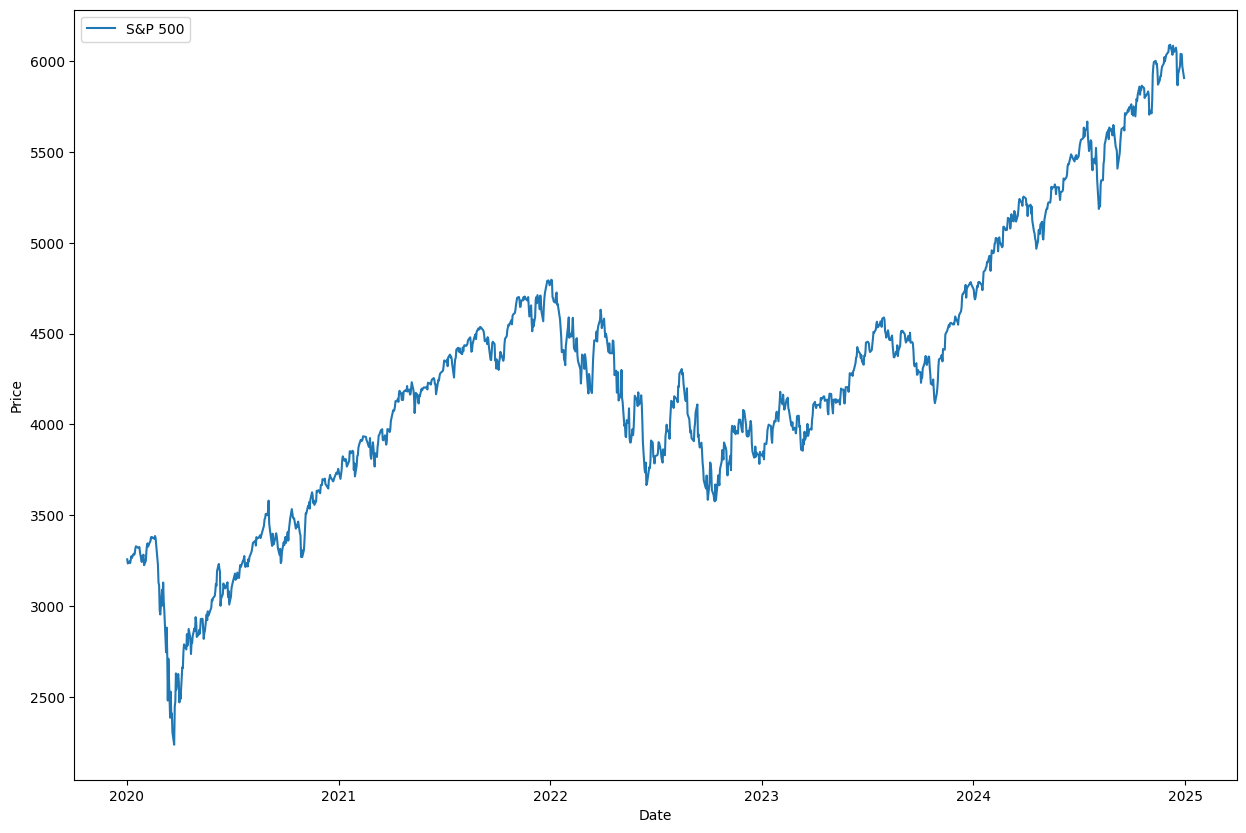

In [2]:
plt.figure(figsize=(15, 10))
plt.plot(df_sp500['Close'], label='S&P 500')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()


## Time Sereies Decomposition

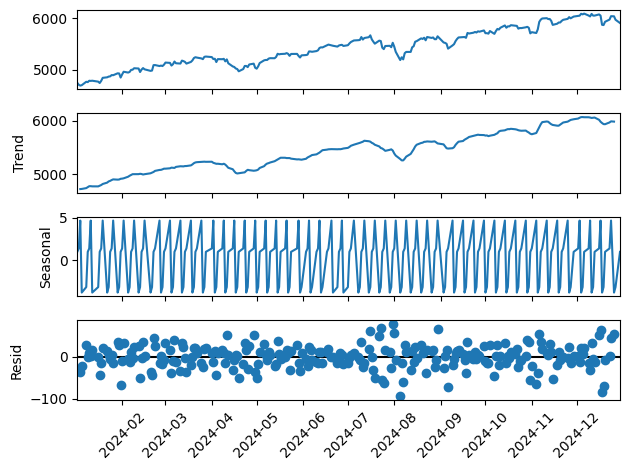

In [3]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(df_sp500.Close.loc['2024-01-01':'2024-12-31'], period=5).plot()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Trend

The autocorrelation function (ACF) is a statistical tool to analyze the relationship between the current value of a time series and its lagged values.

$$
ACF(h) = \frac{Cov(y_t, y_{t-h})}{Var(y_t)} = \frac{\sum_{t=h+1}^{T} (y_t - \bar{y})(y_{t-h} - \bar{y})}{\sum_{t=1}^{T} (y_t - \bar{y})^2}
$$

where:
- $T$ is the total number of observations.
- $y_t$ is the value of the time series at time $t$.
- $\bar{y}$ is the mean of the time series.
- $h$ is the lag.

Strong correlations in the ACF plot indicate that the time series has:
- **Significant memory** (dependence on past values).
- **Trends** (slowly decaying correlations).
- **Seasonality** (periodic spikes at regular intervals).

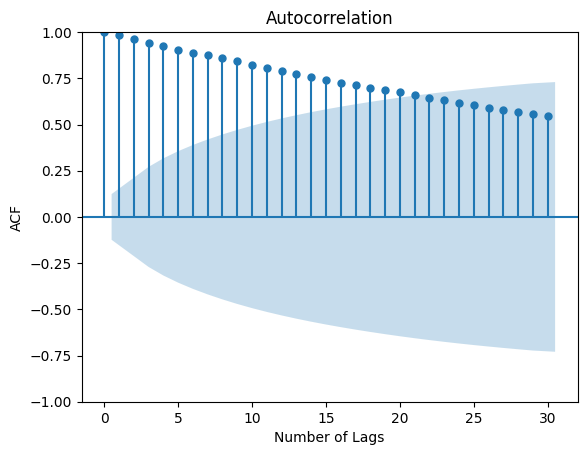

In [4]:
# plot autocorrelation function(ACF)

sm.graphics.tsa.plot_acf(df_sp500.Close.loc['2024-01-01':'2024-12-31'], lags=30)
plt.xlabel('Number of Lags')
plt.ylabel('ACF')
plt.show()

The partial autocrelation plot (PACF) is a graphical method used to determine the order of an autoregressive (AR) model. It helps identify the significant lagged values that contribute to the behavior of the time series.

$$
PACF(h) = \frac{Cov(y_t, y_{t-h}|y_{t-1},y_{t-2},...,y_{t-h+1})}{\sqrt{Var(y_t|y_{t-1},y_{t-2},...,y_{t-h+1})} \sqrt{Var(y_{t-h}|y_{t-1},y_{t-2},...,y_{t-h+1})}}
$$

Where:
- $y_t$ is the time series at time $t$.
- $h$ is the lag.

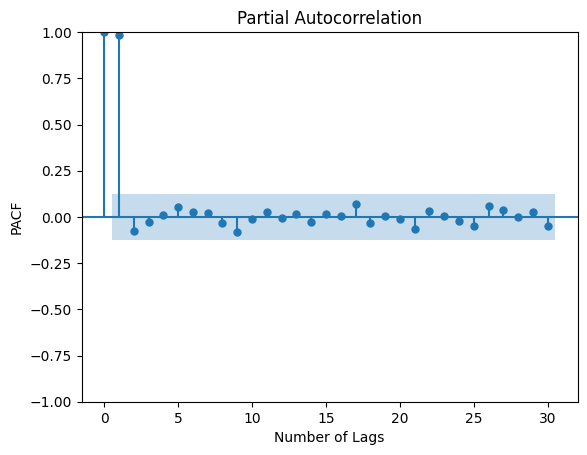

In [5]:
# plot partial autocorrelation function (PACF)

sm.graphics.tsa.plot_pacf(df_sp500.Close.loc['2024-01-01':'2024-12-31'], lags=30)
plt.xlabel('Number of Lags')
plt.ylabel('PACF')
plt.show()

### Seasonality

In [6]:
## plot YOY trend

df2 = df_sp500.Close.copy()
df2.columns = ['GSPC']
df2['Year'] = df2.index.year
df2['DayOfYear'] = df2.index.dayofyear
df2.head(3)

,GSPC,Year,DayOfYear
Date,,,
2020-01-02,3257.850098,2020,2
2020-01-03,3234.850098,2020,3
2020-01-06,3246.280029,2020,6


In [7]:
df2_yoy = df2.pivot(index='DayOfYear', columns='Year', values='GSPC')
df2_yoy.head(3)

Year,2020,2021,2022,2023,2024
DayOfYear,,,,,
2,3257.850098,NaN,NaN,NaN,4742.830078
3,3234.850098,NaN,4796.560059,3824.139893,4704.810059
4,NaN,3700.649902,4793.540039,3852.969971,4688.680176


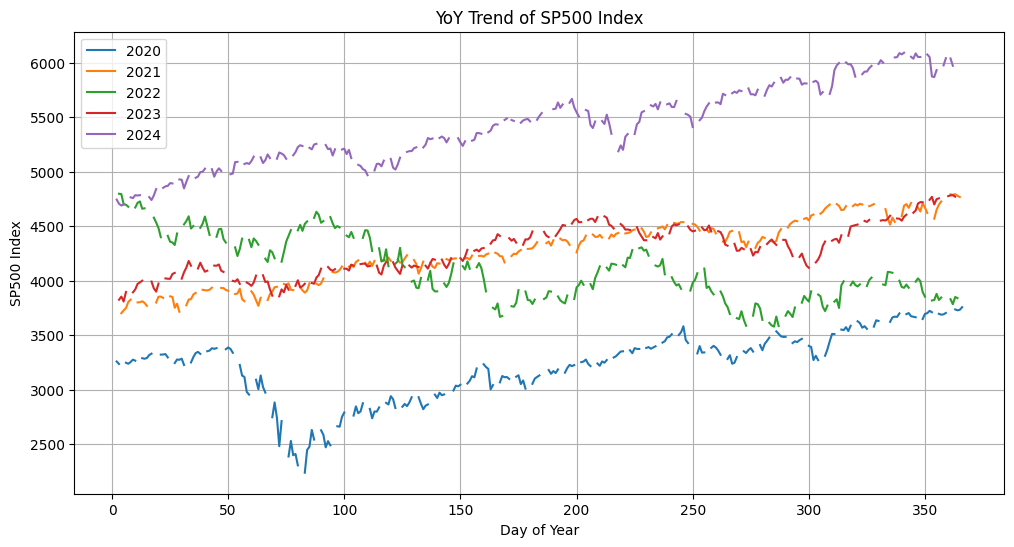

In [8]:
plt.figure(figsize=(12, 6))
for year in df2_yoy.columns:
    plt.plot(df2_yoy.index, df2_yoy[year], label=year)
plt.legend()
plt.title('YoY Trend of SP500 Index')
plt.xlabel('Day of Year')
plt.ylabel('SP500 Index')
plt.grid()
plt.show()

In [9]:
df3 = df_sp500.Close.copy().rename(columns={'^GSPC': 'GSPC'})
df3['Year'] = df3.index.year
df3['Week'] = df3.index.isocalendar().week
df3.head(3)

Ticker,GSPC,Year,Week
Date,,,
2020-01-02,3257.850098,2020,1
2020-01-03,3234.850098,2020,1
2020-01-06,3246.280029,2020,2


In [10]:
df3_weekly = df3.groupby(['Year', 'Week'])['GSPC'].mean().reset_index()
df3_weekly.head(3)

,Year,Week,GSPC
0,2020,1,3246.350098
1,2020,2,3255.312012
2,2020,3,3301.400000


In [11]:
df3_weekly_yoy = df3_weekly.pivot(index='Week', columns='Year', values='GSPC')
df3_weekly_yoy.head(3)

Year,2020,2021,2022,2023,2024
Week,,,,,
1,3246.350098,3760.823975,4732.751953,3845.072510,4948.100098
2,3255.312012,3794.886035,4686.317969,3952.642041,4773.512109
3,3301.400000,3836.325012,4497.634888,3947.822571,4781.484985


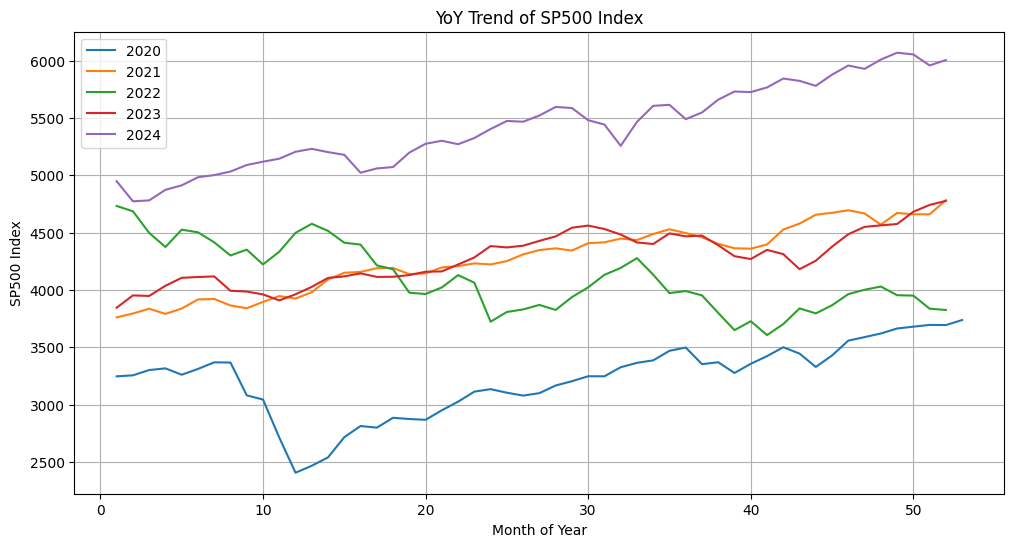

In [12]:
plt.figure(figsize=(12, 6))
for year in df3_weekly_yoy.columns:
    plt.plot(df3_weekly_yoy.index, df3_weekly_yoy[year], label=year)
plt.legend()
plt.title('YoY Trend of SP500 Index')
plt.xlabel('Month of Year')
plt.ylabel('SP500 Index')
plt.grid()
plt.show()